<a href="https://colab.research.google.com/github/povembu/NLP-project-D590/blob/main/Basic_analysis_of_the_dataset_NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Project

# Basic exploration of the dataset

In [1]:
!pip install datasets #install datasets library for HuggingFace

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 23.6 MB/s eta 0:00:00


In [2]:
from datasets import list_datasets, load_dataset
from pprint import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
stop_words = nltk.corpus.stopwords.words('english')

In [4]:
#download using the dataset name
dataset = load_dataset('hate_speech18')

Generating train split:   0%|          | 0/10944 [00:00<?, ? examples/s]

In [5]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'user_id', 'subforum_id', 'num_contexts', 'label'],
        num_rows: 10944
    })
})


In [6]:
dataset.set_format(type='pandas',columns=['text', 'user_id', 'subforum_id', 'num_contexts', 'label'])

In [7]:
hate_df = dataset['train'][:]
hate_df.head()

,text,user_id,subforum_id,num_contexts,label
0,"As of March 13th , 2014 , the booklet had been...",572066,1346,0,0
1,In order to help increase the booklets downloa...,572066,1346,0,0
2,( Simply copy and paste the following text int...,572066,1346,0,0
3,Click below for a FREE download of a colorfull...,572066,1346,0,1
4,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...,572066,1346,0,0


In [8]:
hate_df.to_csv('hate_speech18.csv', index=False)

In [12]:
hate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10944 entries, 0 to 10943
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          10944 non-null  object
 1   user_id       10944 non-null  int64 
 2   subforum_id   10944 non-null  int64 
 3   num_contexts  10944 non-null  int64 
 4   label         10944 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 427.6+ KB


In [13]:
hate_df['label'].unique()

''' 0 - no hate
    1 - hate speech
    2 - idk/skip
    3 - relation '''

' 0 - no hate\n    1 - hate speech\n    2 - idk/skip\n    3 - relation '

In [14]:
pd.options.display.max_colwidth = 200
hate_df.loc[hate_df['label'] == 2]

,text,user_id,subforum_id,num_contexts,label
254,Glædelig jul !,573835,1393,0,2
267,"Det er forresten en ting til Órkneyjar vil si deg , `` Tack så mycket . ''",572043,1393,0,2
292,Jag har inte själv varit med någon gång men jag har stor respekt för de som deltar .,589670,1393,1,2
296,Suomalainen totta kai !,581207,1393,0,2
471,ApÃ © ro gÃ © ant : trois jeunes soupÃ § onnÃ © s de viol https : //www.stormfront.org/forum/t809905/,579750,1383,0,2
...,...,...,...,...,...
10152,.,572043,1391,0,2
10154,IV .,572043,1391,0,2
10251,Freundschaft - Sleipnir & Nemesis with/mit English and/und Deutsch Lyrics - YouTube,576775,1383,0,2
10324,?,599107,1381,0,2


2 and 3 target label don't make much sense.
'idk/skip' - 2 is used wherever they are not sure of the sentiment of a comment. It could be a different language/some URLs
'relation' - 3 seems like a constructive feedback/a normal comment on something.

In [15]:
hate_df['label'].value_counts()

0    9507
1    1196
3     168
2      73
Name: label, dtype: int64

Selecting only text and label columns

In [18]:
hate_df = hate_df[['text','label']]


In [19]:
hate_df.head()

,text,label
0,"As of March 13th , 2014 , the booklet had been downloaded over 18,300 times and counting .",0
1,"In order to help increase the booklets downloads , it would be great if all Stormfronters who had YouTube accounts , could display the following text in the description boxes of their uploaded You...",0
2,( Simply copy and paste the following text into your YouTube videos description boxes. ),0
3,Click below for a FREE download of a colorfully illustrated 132 page e-book on the Zionist-engineered INTENTIONAL destruction of Western civilization .,1
4,Click on the `` DOWNLOAD ( 7.42 MB ) '' green banner link .,0


In [20]:
total_nulls = hate_df[hate_df.text.str.strip() == ''].shape[0]
print("Empty documents:", total_nulls)

Empty documents: 0


<Axes: >

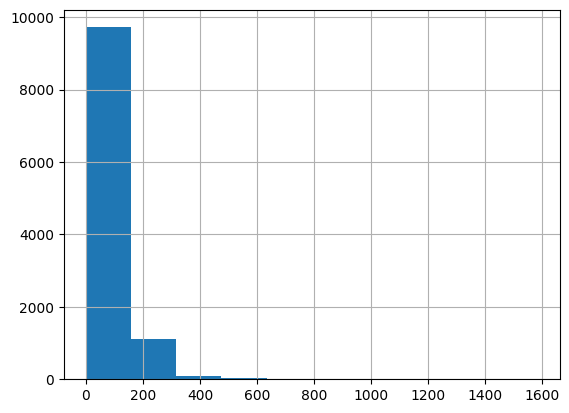

In [21]:
hate_df['text'].str.len().hist() #number of characters present in each sentence

<Axes: >

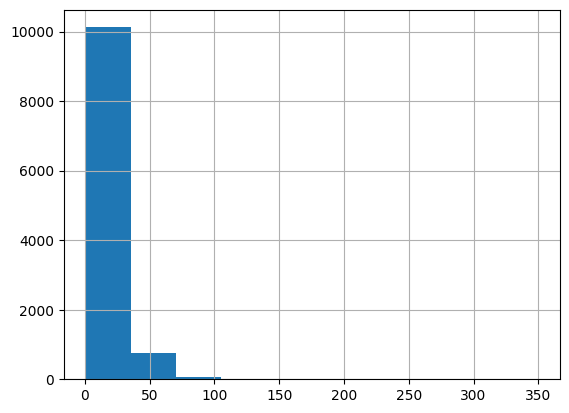

In [22]:
hate_df['text'].str.split().map(lambda x: len(x)).hist() #number of words - has a range of 0-40

<Axes: >

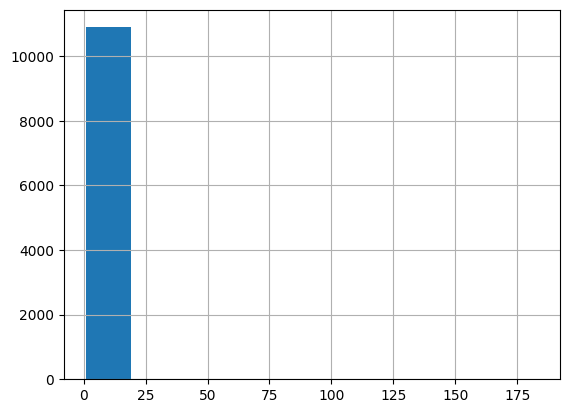

In [23]:
hate_df['text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist() #avg word length - between 1 - 20

In [24]:
#basic preprocessing
def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip('')
    # tokenize document
    wpt = nltk.WordPunctTokenizer()
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

In [25]:
normalize_corpus = np.vectorize(normalize_document)

In [26]:
norm_corpus = []

for i in hate_df['text']:
  norm_corpus.append(normalize_corpus(i))

In [27]:
hate_df['cleaned_text'] = norm_corpus

In [28]:
hate_df.head()

,text,label,cleaned_text
0,"As of March 13th , 2014 , the booklet had been downloaded over 18,300 times and counting .",0,march 13th 2014 booklet downloaded 18300 times counting
1,"In order to help increase the booklets downloads , it would be great if all Stormfronters who had YouTube accounts , could display the following text in the description boxes of their uploaded You...",0,order help increase booklets downloads would great stormfronters youtube accounts could display following text description boxes uploaded youtube videos
2,( Simply copy and paste the following text into your YouTube videos description boxes. ),0,simply copy paste following text youtube videos description boxes
3,Click below for a FREE download of a colorfully illustrated 132 page e-book on the Zionist-engineered INTENTIONAL destruction of Western civilization .,1,click free download colorfully illustrated 132 page ebook zionistengineered intentional destruction western civilization
4,Click on the `` DOWNLOAD ( 7.42 MB ) '' green banner link .,0,click download 742 mb green banner link
